# Python Exercise: KNN

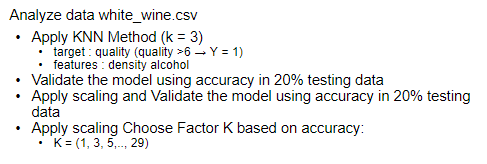


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
wine = pd.read_csv('white_wine.csv')

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [7]:
wine['label'] = np.where(wine['quality']>6, 1, 0)

<AxesSubplot:xlabel='density', ylabel='alcohol'>

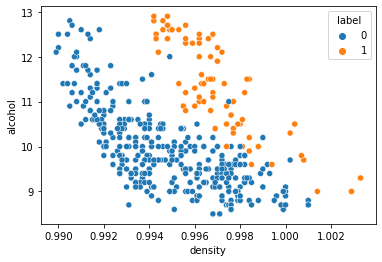

In [8]:
sns.scatterplot(x = 'density', y = 'alcohol', data = wine, hue = 'label')

In [9]:
wine[['alcohol', 'density']].isnull().sum()

alcohol    1
density    0
dtype: int64

In [10]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

In [11]:
X = wine[['alcohol','density']]
y = wine['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2, 
    random_state = 2020) # make the result consistent

> ## Without Scaling

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_predict_class = knn.predict(X_test)

In [19]:
print('model accuracy in test dataset:', accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9038461538461539


> ## With Scaling

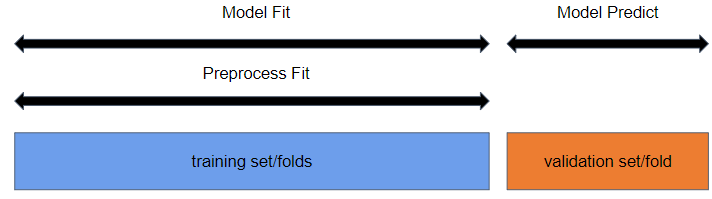

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,y_train) # model fit
y_predict_class = knn.predict(X_test_scaled) # model predict

In [23]:
print('model accuracy in test dataset:', accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9807692307692307


The accuracy improved from 0.9038 to 0.9876 after we applied scaling.

> ## Choose Factor K

In [24]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

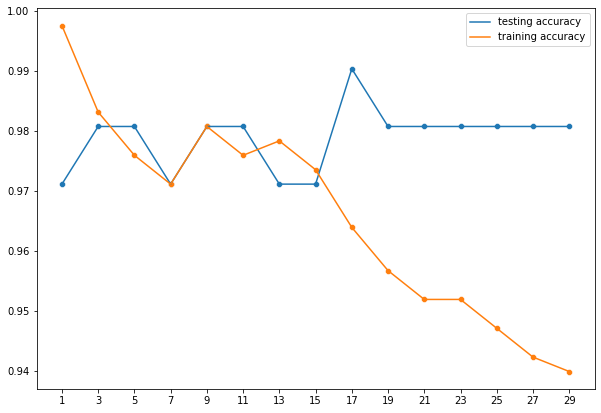

In [25]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k));

In [26]:
print('best k:', best_k)
print('accuracy:', score)

best k: 17
accuracy: 0.9903846153846154


The best factor k for this case is 17 with 99.03 % accuracy. The performance improved again from 98.76% accuracy to 99.03% accuracy.

# Python Exercise: Decision Tree Clasiifier

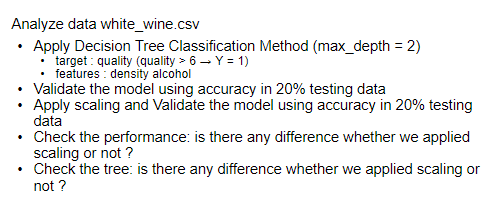

> ## Without Scaling

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2
)
tree.fit(X_train,y_train)
y_predict_class = tree.predict(X_test)

In [29]:
print('model accuracy in test dataset:', accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


In [30]:
from sklearn.tree import plot_tree

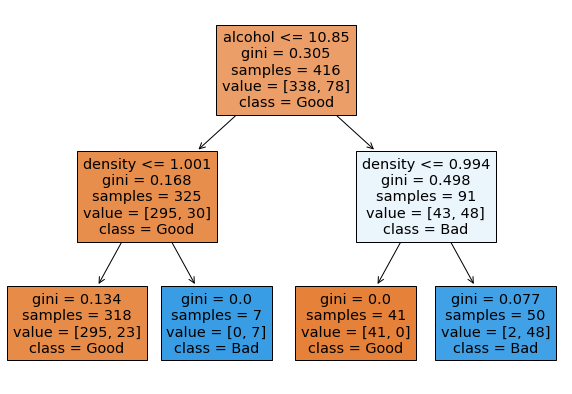

In [31]:
plt.figure(figsize = (10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Good', 'Bad'], filled = True)
plt.show()

> ## With Scaling

In [32]:
tree = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2
)
tree.fit(X_train_scaled,y_train)
y_predict_class = tree.predict(X_test_scaled)

In [33]:
print('model accuracy in test dataset:', accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


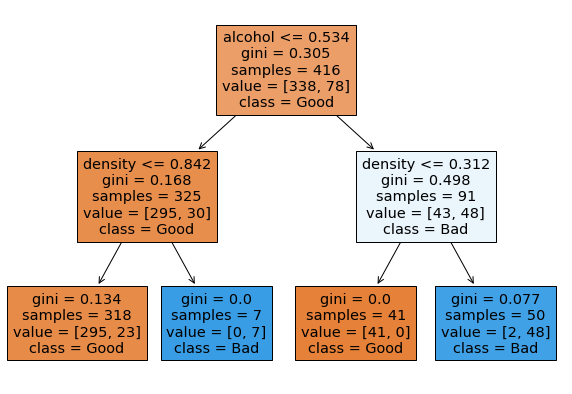

In [34]:
plt.figure(figsize = (10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Good','Bad'], filled = True)
plt.show()

There is no difference in performance whether we applied scaling or not. Instead scaling make the tree harder to understand because the unit of variables change. The unit of alchohol is no longer in % and the unit in density is no longer in Kg/m^2. 

  As comparison, it is easier to explain the rule in the first tree. In the first tree we can say that if there is a wine with the alcohol below 10.85 % and the density below 1.001 kg/m^2 the wine will be predicted as good quality wine. While in the second tree what we are able to say directly is if there is a wine with the standardize version of alcohol variable below 0.534 and the standardize version of density below 0.842 the wine will be predicted as good quality wine. The second one is much harder to understand.
